# Predicting Chronic Diseases and Personalized Health Insights

## Importing Libraries 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Loading the dataset

In [4]:

# column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv('heart+disease\Heart_disease_cleveland_new.csv')

# Preview the data
print(data.head())
print(data.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\admin\AppData\Local\Temp\ipykernel_7832\3433736326.py:2: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv('heart+disease\Heart_disease_cleveland_new.csv')


In [5]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## Data Preprocessing 

In [6]:
# Handle missing values
data.replace('?', np.nan, inplace=True)

data.dropna(inplace=True)

# Convert columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col])

# Verify data types
print(data.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## Feature Selection and Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Spliting dataset 

In [8]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelling experiments 

1. **Model_1** -->  Random Forest Classifier
2. **Model_2** --> XGboost classification 
3. **Model_3** --> Logistic Regression 

### Creating Model_1  [Random Forest Classifier]

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

# Predict
y_pred = model_1.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[27  2]
 [ 5 27]]


### Creating Model_2 [XGBoost]

In [10]:
# from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model_2 = XGBClassifier()
model_2.fit(X_train, y_train)

# Predict
y_pred = model_2.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]


### Creating Model_3 [Logistic Regression]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model_3 = LogisticRegression()
model_3.fit(X_train, y_train)

# Predict
y_pred = model_3.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[25  4]
 [ 3 29]]


In [12]:
def compare_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        matrix = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': matrix
        }
        
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n {matrix}\n")
    
    return  results

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

results = compare_models(models, X_train, X_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Model: Random Forest
Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion Matrix:
 [[28  1]
 [ 5 27]]

Model: XGBoost
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   

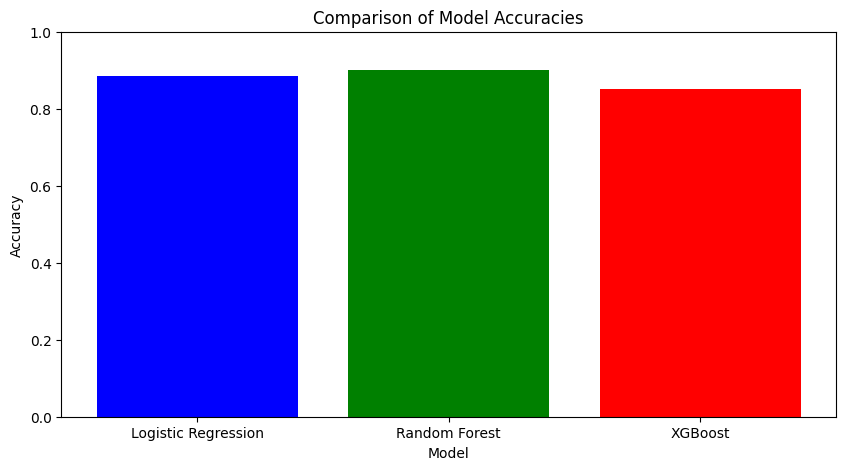

In [14]:
# Plotting the results
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()


## Creating a function to give information about their heart health 

In [ ]:
def health_recommendations(patient_data,model_n):

    """
        predicts the risk of heart disease with selected model
    """
    prediction = model_n.predict([patient_data])
    if prediction == 1:
        return "Higher risk of heart disease. Consider consulting a healthcare provider for personalized advice."
    else:
        return "Lower risk of heart disease. Maintain a healthy lifestyle to keep your heart healthy."

# predicting heart disease risk
# patient_data = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target] these are the parameters to be given  for model to predict risk of heart disease

# example
patient_data_with_high_risk = X_test[2]  
patient_data_with_low_risk = X_test[10] 

print(health_recommendations(patient_data_with_high_risk,model_n=model_3))
print(health_recommendations(patient_data_with_low_risk,model_n=model_3))


Higher risk of heart disease. Consider consulting a healthcare provider for personalized advice.
Lower risk of heart disease. Maintain a healthy lifestyle to keep your heart healthy.
